BASE DE DADOS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_data(X, y, title="Dataset"):
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    labels = np.unique(y)
    for label in labels:
        mask = y == label
        plt.scatter(X[mask, 0], X[mask, 1], label=f"Label {label}", alpha=0.7)

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_decision_boundaries(BD, y, model, title="Decision Boundaries"):
    # Create a mesh 
    x_min, x_max = BD[:, 0].min() - .5, BD[:, 0].max() + .5
    y_min, y_max = BD[:, 1].min() - .5, BD[:, 1].max() + .5
    h = 0.02 

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict each point in mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(BD[:, 0], BD[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Matplotlib is building the font cache; this may take a moment.


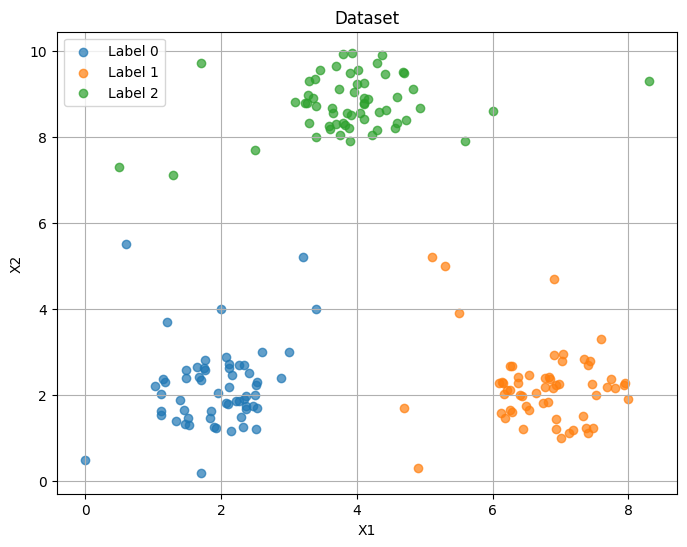

In [2]:
X_test = np.array([[0.12, 0.88],[1.23, 0.97],[2.99, 1.02],[3.78, 1.35],[3.68, 3.87],[3.36, 5.28],[1.1, 5.63],[2.73, 4.42],[2.83, 3.32],[1.04,3.48],
              [4.69, 0.58],[4.38, 1.95],[5.72, 4.58],[5.29, 0.72],[6.83, 2.45],[5.54, 2.58],[5.74, 5.38],[7.77, 1.26],[8, 4.38],[6.94, 3.65],
              [0.63, 6.64],[1.84, 9.24],[1.79, 7.83],[2.17, 8.13],[3.83, 9.1],[3.12, 7],[4.1, 6.84],[7.72, 7.12],[6, 9.23],[5.61, 6.55]])


BD = np.array([[0.0, 0.5],[1.7, 0.2],[2.3, 1.5],[3.0, 3.0],[3.4, 4.0],[3.2, 5.2],[0.6, 5.5],[2.0, 4.0],[2.6, 3.0],[1.2,3.7],
            [1.47, 1.33],[1.84, 1.48],[1.45, 1.65],[2.47, 1.75],[2.11, 1.79],[1.95, 2.05],[2.37, 1.97],[2.07, 1.82],[1.18, 2.31],[1.14, 2.38],
            [2.15, 1.16],[1.03, 2.22],[2.53, 2.30],[1.92, 1.23],[2.53, 1.70],[1.34, 1.39],[2.37, 1.74],[2.16, 2.46],[1.40, 1.89],[1.51, 1.48],
            [2.26, 1.87],[2.88, 2.41],[1.90, 1.26],[2.12, 2.19],[1.77, 2.59],[2.33, 1.27],[2.52, 1.22],[2.12, 2.63],[1.68, 2.43],[1.11, 1.64],
            [2.50, 2.01],[1.85, 1.63],[2.41, 2.51],[1.76, 2.82],[1.48, 2.41],[2.52, 2.24],[2.22, 1.87],[1.70, 2.36],[2.37, 1.68],[2.27, 2.69],
            [1.53, 1.31],[1.64, 2.66],[1.75, 2.63],[1.49, 2.58],[1.12, 2.02],[2.08, 2.88],[1.12, 1.54],[2.34, 1.90],[2.34, 2.70],[2.12, 2.73],
             [4.9, 0.3],[4.7, 1.7],[5.3, 5],[5.5, 3.9],[6.4, 2],[6.9, 4.7],[5.1, 5.2],[7.0, 1.0],[8, 1.9],[7.6, 3.3],
            [7.95, 2.29],[7.19, 1.20],[7.12, 1.13],[7.34, 2.85],[6.28, 1.60],[6.89, 2.16],[6.54, 1.66],[6.74, 1.82],[7.46, 2.27],[6.81, 1.85],
            [6.45, 1.22],[6.77, 2.39],[6.18, 1.46],[6.26, 2.67],[7.41, 1.13],[7.33, 1.52],[6.28, 2.67],[7.68, 2.20],[6.94, 1.44],[7.52, 2.01],
            [7.02, 2.79],[6.21, 2.13],[7.48, 1.24],[6.98, 2.25],[6.64, 2.06],[6.09, 2.29],[6.25, 1.65],[6.15, 2.29],[6.13, 1.59],[6.17, 2.02],
            [6.49, 1.76],[6.83, 2.43],[6.14, 2.30],[6.77, 2.18],[6.90, 2.94],[7.37, 1.24],[6.85, 2.37],[7.74, 2.38],[6.53, 2.48],[6.26, 2.11],
            [7.80, 2.16],[6.94, 2.23],[6.38, 2.42],[6.37, 2.29],[7.93, 2.23],[6.93, 1.22],[7.43, 2.79],[7.40, 2.71],[7.03, 2.95],[6.43, 1.99],
               [0.5, 7.3],[1.7, 9.7],[1.3, 7.1],[2.5, 7.7],[3.4, 8],[3.9, 7.9],[4.1, 8.4],[8.3, 9.3],[6, 8.6],[5.6, 7.9],
            [3.79, 9.92],[4.56, 8.21],[3.65, 8.54],[3.91, 8.51],[3.46, 9.56],[3.93, 9.95],[3.09, 8.80],[3.38, 9.35],[3.59, 8.26],[3.61, 8.17],
            [4.05, 8.54],[3.83, 8.27],[3.28, 8.97],[4.43, 8.61],[4.42, 9.45],[3.88, 8.21],[3.80, 8.31],[3.64, 8.66],[4.16, 8.88],[4.10, 9.24],
            [4.59, 8.32],[3.96, 9.04],[4.00, 9.23],[3.36, 8.90],[3.75, 8.04],[4.82, 9.10],[4.22, 8.04],[3.69, 9.64],[3.69, 8.29],[4.68, 9.51],
            [4.59, 8.93],[4.93, 8.66],[4.30, 8.15],[4.32, 8.57],[4.37, 9.90],[4.11, 8.89],[3.27, 8.78],[4.01, 9.54],[3.40, 8.71],[4.10, 8.78],
            [3.74, 9.11],[3.24, 8.78],[4.30, 9.71],[4.10, 8.75],[4.72, 8.38],[3.90, 9.48],[3.29, 9.30],[3.30, 8.33],[3.86, 8.56],[4.69, 9.47]])

y = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

y_test = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


code_matrix = np.array([
    [0,  1,  1],
    [ 0, 0,  1],
    [ 1,  1, 0]])


plot_2d_data(BD,y)

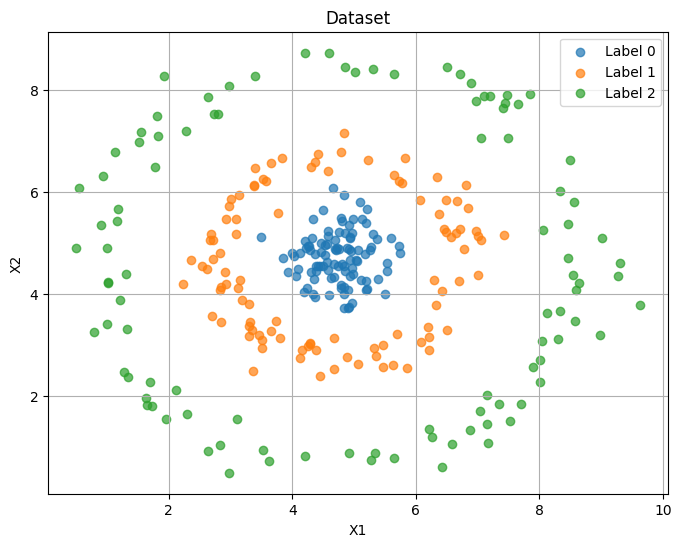

In [3]:
BD2 =  np.array([[5.05, 4.64],[5.12, 5.47],[4.68, 4.59],[5.59, 5.09],[4.56, 4.98],[4.57, 4.48],[4.92, 3.75],[3.93, 4.43],[4.29, 4.87],[4.34, 4.00],
        [5.53, 4.60],[4.83, 4.00],[4.53, 4.76],[4.22, 4.90],[4.50, 4.56],[4.50, 5.64],[4.79, 4.18],[5.21, 4.10],[4.90, 3.73],[4.13, 4.81],
        [5.17, 4.79],[4.74, 4.56],[4.06, 4.35],[4.57, 5.24],[4.97, 3.83],[4.96, 4.52],[4.46, 5.01],[5.31, 5.17],[4.38, 4.55],[4.96, 5.20],
        [4.56, 4.62],[4.24, 4.11],[5.20, 5.39],[4.76, 5.21],[4.98, 4.39],[4.98, 5.48],[4.78, 5.49],[3.49, 5.12],[4.84, 4.56],[4.84, 3.72],
        [4.69, 4.89],[5.54, 4.45],[4.39, 4.46],[5.25, 4.87],[4.53, 4.97],[4.85, 5.19],[4.45, 4.55],[4.60, 3.98],[4.95, 4.84],[4.80, 4.59],
        [4.09, 4.50],[4.63, 4.31],[4.72, 4.91],[5.74, 4.80],[4.93, 4.67],[3.84, 4.70],[4.83, 5.94],[4.70, 4.86],[4.78, 4.12],[5.37, 5.08],
        [5.19, 4.25],[5.50, 4.01],[5.09, 5.80],[4.30, 4.43],[4.85, 4.46],[4.02, 4.74],[4.27, 4.95],[4.34, 5.48],[4.41, 4.55],[5.20, 4.09],
        [4.91, 5.36],[3.99, 4.80],[4.93, 5.10],[4.18, 4.05],[5.06, 4.86],[4.92, 4.88],[4.46, 4.83],[4.94, 4.35],[5.73, 4.95],[4.20, 5.04],
        [4.31, 5.10],[5.38, 4.30],[5.28, 4.92],[5.21, 5.66],[4.67, 4.33],[4.35, 4.30],[4.76, 4.88],[4.94, 5.12],[4.80, 5.44],[4.66, 6.07],
        [5.11, 4.28],[4.26, 4.95],[4.69, 5.07],[5.03, 4.67],[4.37, 3.95],[4.57, 5.14],[4.90, 4.09],[4.88, 4.90],[4.36, 4.79],[4.83, 4.14],
        [6.20, 3.35],[4.67, 2.54],[4.12, 2.74],[4.26, 2.98],[3.57, 6.21],[4.30, 6.49],[5.46, 3.01],[5.63, 2.61],[6.21, 3.15],[6.33, 3.78],
        [2.53, 4.55],[2.71, 4.69],[5.47, 2.57],[3.51, 2.94],[4.28, 3.04],[5.32, 2.95],[6.51, 3.29],[3.65, 6.57],[3.38, 6.11],[6.49, 5.84],
        [2.70, 3.58],[6.57, 5.12],[2.68, 5.17],[2.93, 4.20],[4.36, 6.59],[2.84, 3.45],[7.00, 5.14],[6.98, 5.23],[5.85, 2.56],[3.52, 6.25],
        [6.34, 6.29],[2.91, 4.44],[5.06, 2.63],[5.22, 6.62],[3.34, 3.29],[6.67, 5.82],[6.46, 5.27],[2.22, 4.19],[3.15, 4.28],[3.73, 3.47],
        [4.45, 2.39],[7.01, 4.37],[2.62, 4.49],[3.83, 6.67],[5.36, 2.79],[4.57, 6.42],[2.92, 5.47],[6.38, 5.56],[7.06, 5.07],[6.70, 4.25],
        [5.70, 3.21],[4.16, 2.91],[3.01, 5.86],[5.65, 6.33],[5.77, 6.17],[4.79, 6.78],[2.82, 4.08],[4.39, 2.91],[3.80, 3.14],[4.41, 6.74],
        [6.30, 4.27],[4.68, 3.14],[3.12, 4.11],[3.32, 3.46],[2.97, 5.72],[4.83, 7.15],[3.40, 6.48],[4.89, 2.76],[6.78, 4.89],[6.06, 5.84],
        [6.71, 5.28],[6.65, 5.19],[6.09, 3.06],[4.29, 3.03],[2.67, 5.06],[6.81, 6.13],[2.83, 4.81],[2.71, 5.06],[5.82, 6.66],[3.08, 5.47],
        [3.14, 5.94],[3.30, 3.38],[3.46, 3.19],[6.49, 5.21],[3.38, 6.13],[3.29, 3.18],[2.36, 4.66],[6.22, 2.91],[3.36, 2.49],[5.72, 6.22],
        [6.84, 5.68],[3.51, 3.11],[7.42, 5.15],[3.29, 3.81],[6.42, 4.07],[3.18, 3.88],[3.76, 5.59],[3.65, 3.27],[3.09, 5.17],[2.84, 4.13],
        [8.59, 4.09],[8.55, 4.38],[3.53, 0.95],[1.20, 3.88],[3.40, 8.28],[6.22, 1.36],[2.97, 0.50],[6.89, 8.13],[8.01, 2.70],[6.59, 1.06],
        [8.57, 3.48],[4.20, 0.82],[1.63, 1.97],[1.12, 6.79],[8.30, 3.13],[7.35, 1.85],[8.56, 5.81],[8.06, 5.25],[2.27, 7.19],[6.43, 0.61],
        [9.28, 4.35],[7.10, 7.89],[1.33, 2.38],[1.80, 7.49],[9.63, 3.78],[7.17, 1.08],[6.88, 1.34],[1.16, 5.43],[1.77, 6.50],[4.20, 8.73],
        [8.34, 6.02],[7.16, 2.02],[6.26, 1.20],[8.47, 4.70],[9.30, 4.61],[0.79, 3.25],[5.27, 0.74],[8.98, 3.20],[7.15, 1.45],[4.86, 8.45],
        [0.55, 6.07],[7.66, 7.73],[8.33, 3.66],[1.70, 2.27],[5.30, 8.41],[3.10, 1.55],[1.64, 1.82],[1.92, 8.27],[7.50, 7.05],[2.83, 1.04],
        [1.02, 4.22],[5.34, 0.89],[1.01, 4.23],[7.04, 1.71],[0.99, 3.42],[1.32, 3.31],[7.71, 1.85],[1.52, 6.98],[7.41, 7.64],[8.46, 5.38],
        [4.92, 0.88],[1.72, 1.81],[3.62, 0.73],[5.65, 8.32],[7.44, 7.75],[9.01, 5.09],[2.73, 7.53],[1.28, 2.48],[1.83, 7.09],[0.94, 6.31],
        [7.90, 2.57],[2.80, 7.53],[1.30, 4.40],[5.64, 0.78],[1.55, 7.18],[2.11, 2.12],[7.52, 1.52],[8.12, 3.62],[7.20, 7.89],[8.05, 3.09],
        [1.00, 4.90],[4.59, 8.72],[1.18, 5.66],[8.65, 4.22],[0.50, 4.91],[2.98, 8.08],[1.95, 1.55],[5.02, 8.36],[8.49, 6.62],[7.85, 7.92],
        [7.06, 7.06],[6.97, 7.78],[7.48, 7.90],[2.30, 1.66],[6.50, 8.45],[2.64, 7.86],[8.01, 2.28],[0.90, 5.35],[2.64, 0.93],[6.71, 8.31]])

y2 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

plot_2d_data(BD2,y2)

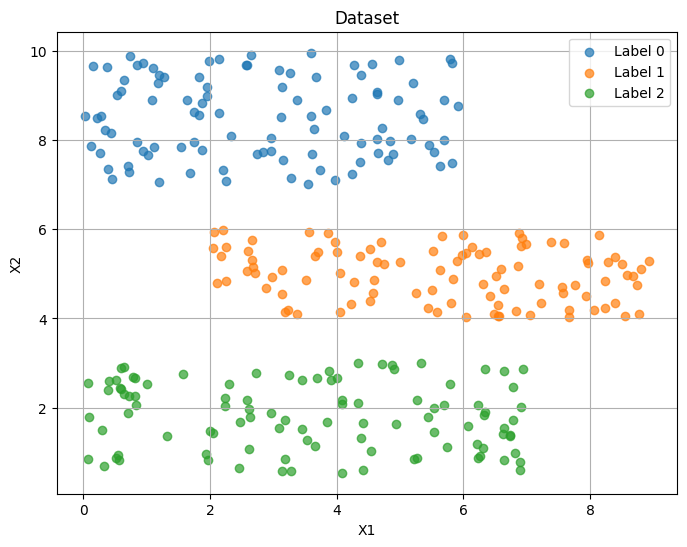

In [4]:
BD3 = np.array ([[2.25, 7.09],[5.70, 8.91],[4.39, 7.94],[3.59, 8.53],[0.94, 9.72],[0.94, 7.75],[0.35, 8.23],[5.20, 9.27],[3.61, 7.69],[4.25, 7.23],
        [0.12, 7.87],[5.82, 7.48],[4.99, 9.79],[1.27, 9.42],[1.09, 8.90],[1.10, 9.61],[1.83, 9.41],[3.15, 7.56],[2.59, 9.68],[1.75, 8.62],
        [3.67, 9.42],[0.84, 9.69],[1.75, 7.95],[2.20, 7.33],[2.74, 7.68],[4.71, 8.28],[1.20, 9.45],[3.09, 9.58],[3.55, 7.02],[0.28, 8.53],
        [3.65, 8.25],[1.02, 7.67],[0.39, 7.36],[5.69, 8.01],[5.79, 9.83],[4.85, 7.97],[1.83, 8.56],[0.59, 9.11],[4.11, 8.09],[2.64, 9.92],
        [0.73, 9.89],[2.97, 7.76],[0.21, 8.49],[5.46, 7.90],[1.55, 7.85],[3.98, 7.11],[1.87, 8.83],[3.12, 8.51],[3.28, 7.15],[1.11, 7.84],
        [5.82, 9.72],[4.65, 7.72],[5.64, 7.43],[5.37, 8.47],[3.59, 9.96],[5.53, 7.73],[0.53, 9.02],[1.18, 9.28],[0.27, 7.71],[1.95, 9.18],
        [2.33, 8.10],[1.63, 8.90],[4.97, 8.90],[2.14, 8.61],[1.69, 7.27],[3.26, 9.51],[0.85, 7.96],[4.81, 7.56],[0.45, 7.12],[5.92, 8.77],
        [4.63, 9.03],[1.19, 7.05],[0.03, 8.54],[4.89, 7.68],[4.24, 8.94],[4.37, 7.52],[4.63, 9.07],[0.44, 8.16],[2.15, 9.81],[0.70, 7.41],
        [5.18, 8.02],[3.74, 7.34],[1.99, 9.77],[0.38, 9.63],[1.87, 7.77],[1.95, 8.98],[4.38, 9.45],[3.83, 8.67],[5.32, 8.59],[2.83, 7.73],
        [0.72, 7.28],[4.28, 9.69],[4.56, 9.70],[3.37, 8.90],[4.63, 8.02],[2.96, 8.05],[3.14, 9.18],[2.57, 9.69],[0.15, 9.66],[0.65, 9.34],
        [6.49, 4.10],[2.59, 5.06],[3.13, 5.08],[8.29, 5.27],[6.25, 5.45],[2.06, 5.95],[2.71, 5.03],[6.64, 4.65],[2.04, 5.59],[3.13, 4.54],
        [5.84, 4.88],[6.84, 4.16],[6.56, 4.05],[3.57, 5.93],[6.99, 5.67],[3.66, 5.39],[4.28, 4.82],[7.23, 4.35],[6.55, 4.31],[7.94, 4.50],
        [6.60, 5.10],[5.98, 5.43],[2.66, 5.32],[4.57, 4.56],[3.86, 5.91],[3.71, 5.48],[8.81, 5.11],[4.75, 5.22],[8.24, 4.84],[6.42, 4.50],
        [7.56, 4.71],[5.52, 5.52],[6.04, 4.03],[5.45, 4.23],[3.37, 4.09],[7.06, 4.08],[3.97, 5.71],[2.17, 5.41],[6.52, 4.95],[3.24, 4.20],
        [8.58, 4.98],[8.68, 4.95],[8.40, 4.35],[4.59, 4.87],[2.11, 4.80],[8.50, 5.23],[5.00, 5.27],[8.77, 4.09],[8.75, 4.75],[7.97, 5.25],
        [4.06, 5.01],[4.70, 5.71],[7.96, 5.32],[4.22, 4.33],[3.19, 4.14],[5.90, 5.28],[8.55, 4.05],[6.87, 5.17],[5.99, 5.88],[2.68, 5.15],
        [6.31, 4.78],[8.93, 5.29],[2.98, 4.92],[5.63, 5.09],[8.14, 5.88],[7.19, 4.77],[6.88, 5.92],[6.92, 5.81],[4.52, 4.39],[4.06, 4.14],
        [7.67, 4.20],[7.67, 4.04],[8.07, 4.19],[8.39, 5.37],[5.58, 4.14],[5.51, 4.64],[7.59, 5.69],[6.55, 4.05],[6.91, 5.63],[7.57, 4.56],
        [8.23, 4.24],[4.37, 5.39],[4.63, 5.26],[2.66, 5.75],[6.05, 5.47],[2.25, 5.61],[5.26, 4.56],[5.80, 4.35],[4.01, 5.50],[6.14, 5.61],
        [2.21, 5.98],[2.26, 4.83],[7.76, 4.74],[4.52, 5.55],[2.89, 4.68],[5.66, 5.86],[7.39, 5.72],[3.51, 4.86],[6.36, 5.50],[2.60, 5.51],
        [0.72, 2.25],[6.32, 1.84],[3.54, 1.27],[5.79, 2.53],[2.24, 2.21],[6.27, 0.91],[2.72, 2.78],[0.08, 2.56],[6.34, 2.87],[0.64, 2.31],
        [2.24, 2.03],[6.65, 1.55],[6.65, 2.83],[4.01, 2.67],[4.42, 0.61],[3.14, 0.57],[2.05, 1.44],[2.30, 2.53],[4.71, 2.97],[5.27, 0.88],
        [5.54, 1.99],[5.53, 1.45],[0.64, 2.92],[3.46, 2.61],[0.40, 2.60],[3.85, 1.67],[3.09, 1.54],[6.21, 1.18],[2.46, 0.64],[0.82, 2.66],
        [1.00, 2.53],[5.33, 3.00],[4.33, 2.99],[0.71, 1.89],[0.59, 2.42],[4.91, 2.86],[0.51, 2.62],[5.75, 1.12],[4.94, 1.63],[0.57, 0.82],
        [0.59, 2.89],[6.91, 2.02],[2.62, 1.07],[2.59, 2.18],[5.69, 2.05],[6.63, 1.40],[6.90, 0.78],[5.27, 2.18],[2.63, 1.80],[0.58, 2.43],
        [5.44, 1.80],[3.91, 2.63],[2.97, 1.88],[6.34, 1.90],[0.78, 2.69],[3.45, 1.51],[0.08, 0.84],[3.28, 0.57],[0.39, 2.39],[0.83, 2.05],
        [0.82, 2.26],[4.54, 1.03],[5.22, 0.84],[4.08, 0.54],[6.74, 1.38],[2.62, 1.97],[2.00, 1.48],[6.08, 1.59],[1.57, 2.76],[6.74, 1.37],
        [0.09, 1.78],[6.79, 2.46],[0.30, 1.49],[6.24, 2.06],[3.69, 2.66],[6.95, 2.87],[0.52, 0.87],[3.88, 2.82],[6.79, 1.73],[3.66, 1.15],
        [4.41, 1.65],[4.87, 2.95],[3.18, 1.73],[4.39, 1.32],[4.09, 2.08],[6.31, 1.10],[0.32, 0.69],[1.97, 0.82],[6.65, 0.82],[6.23, 0.88],
        [3.19, 0.85],[4.34, 2.10],[1.94, 0.95],[1.32, 1.36],[3.25, 2.74],[2.47, 1.68],[4.09, 2.17],[0.54, 0.93],[6.82, 0.98],[6.90, 0.60]])

y3 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

plot_2d_data(BD3,y3)

$$Implementação $$

In [5]:
class LogisticRegressionBinary:
    def __init__(self, lr=0.1, max_iter=10000):
        self.lr = lr
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradiente
            gw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            gb = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parametros
            self.weights -= self.lr * gw
            self.bias -= self.lr * gb

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        probab = self.predict_proba(X)
        return np.where(probab >= 0.5, 1, 0)


$ECOC$

In [6]:
class ECOCClassifier:
    def __init__(self, code_matrix, lr = 0.1, max_iter=1000):
        self.lr = lr
        self.max_iter = max_iter
        self.code_matrix = code_matrix
        self.classifiers = []

    def fit(self, X, y):
        n_classes, n_classifiers = self.code_matrix.shape
        self.classifiers = []

        for clf_idx in range(n_classifiers):
            binary_labels = np.array([self.code_matrix[class_idx, clf_idx]for class_idx in y])
            clf = LogisticRegressionBinary(lr = self.lr,max_iter=self.max_iter)
            clf.fit(X, binary_labels)
            self.classifiers.append(clf)

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = self.code_matrix.shape[0]
        n_classifiers = len(self.classifiers)

        preds = np.zeros((n_samples, n_classifiers))

        for idx, clf in enumerate(self.classifiers):
            preds[:, idx] = clf.predict(X)

        #Calcular a distancia
        y_pred = []
        for pred_vector in preds:
            distances = np.sum(pred_vector != self.code_matrix, axis=1)
            y_pred.append(np.argmin(distances))

        return np.array(y_pred)


Valores Previstos: [2 2 2 2 0 0 0 0 0 0 2 2 0 2 2 2 1 2 1 1 0 0 0 0 0 0 0 1 1 0]


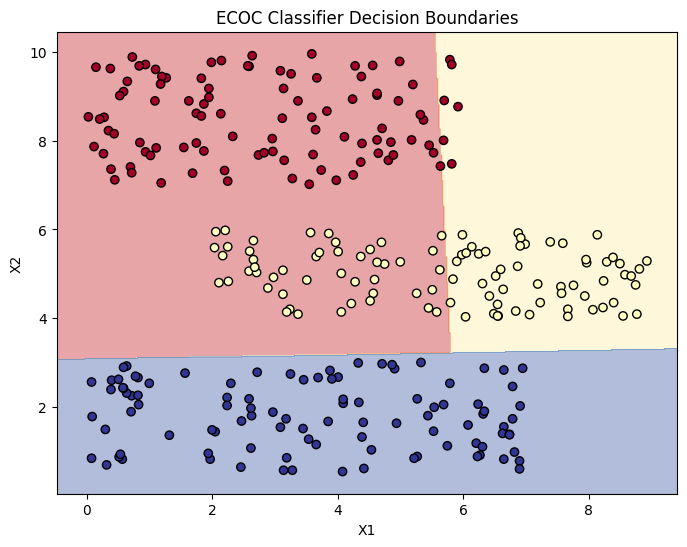

In [23]:
ecoc = ECOCClassifier(code_matrix,lr=0.1, max_iter=1000)
ecoc.fit(BD3, y3)

y_pred = ecoc.predict(X_test)
print("Valores Previstos:", y_pred)

plot_decision_boundaries(BD3, y3, ecoc, title="ECOC Classifier Decision Boundaries")


$\text{ONE VS ALL}$





In [17]:
class OneVsAllClassifier:
    def __init__(self, lr=0.1, max_iter=10000):
        self.lr = lr
        self.max_iter = max_iter
        self.classifiers = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = (y == cls).astype(int)
            clf = LogisticRegressionBinary(lr=self.lr, max_iter=self.max_iter)
            clf.fit(X, y_binary)
            self.classifiers[cls] = clf

    def predict(self, X):
        probs = []
        for cls in self.classes:
            clf = self.classifiers[cls]
            prob = clf.predict_proba(X)
            probs.append(prob)

        probs = np.array(probs).T 
        return self.classes[np.argmax(probs, axis=1)]


Valores Previstos: [2 2 2 2 1 0 0 0 2 2 2 2 1 2 2 2 1 2 1 1 0 0 0 0 0 0 0 1 0 1]


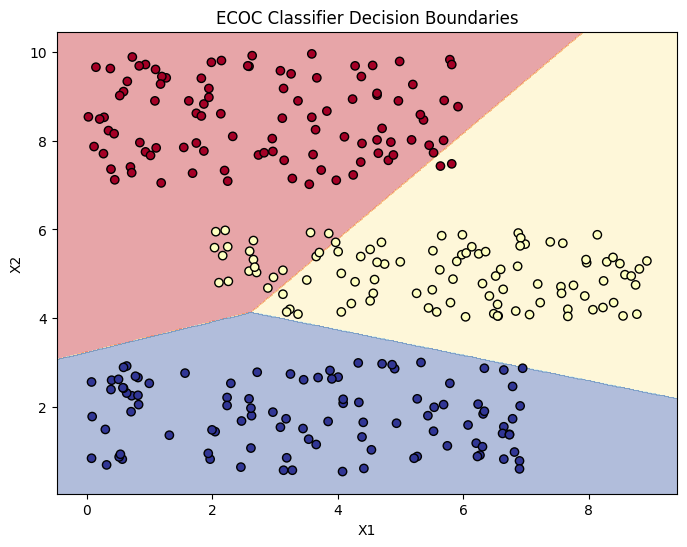

In [28]:
ova = OneVsAllClassifier(lr=0.01, max_iter=10000)
ova.fit(BD3, y3)
y_pred = ova.predict(X_test)

print("Valores Previstos:", y_pred)

plot_decision_boundaries(BD3, y3, ova, title="OVA Classifier Decision Boundaries")

$$\text{MINI BATCH}$$

In [ ]:
class LogisticRegBinaryMiniBatch:
    def __init__(self, lr=0.1, max_iter=1000, batch_size=32):
        self.lr = lr
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.max_iter):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                linear = np.dot(X_batch, self.w) + self.b
                predictions = self.sigmoid(linear)

                gw = (1 / X_batch.shape[0]) * np.dot(X_batch.T, (predictions - y_batch))
                gb = (1 / X_batch.shape[0]) * np.sum(predictions - y_batch)

                self.w -= self.lr * gw
                self.b -= self.lr * gb

    def predict_proba(self, X):
        linear = np.dot(X, self.w) + self.b
        return self.sigmoid(linear)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


$\text{ECOC}$

In [ ]:
class ECOCClassifierMB:
    def __init__(self, code_matrix, lr=0.1, max_iter=100, batch_size=16):
        self.code_matrix = code_matrix
        self.lr = lr
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.classifiers = []

    def fit(self, X, y):
        n_classes, n_codes = self.code_matrix.shape
        self.classifiers = []

        for col in range(n_codes):
            binary_labels = np.array([self.code_matrix[label, col] for label in y])
            clf = LogisticRegBinaryMiniBatch(lr=self.lr, max_iter=self.max_iter, batch_size=self.batch_size)
            clf.fit(X, binary_labels)
            self.classifiers.append(clf)

    def predict(self, X):
        predictions = []
        for clf in self.classifiers:
            pred = clf.predict(X)
            predictions.append(pred)
        predictions = np.array(predictions).T  # (n_samples, n_codes)

        final_preds = []
        for row in predictions:
            distances = [np.sum(row != code) for code in self.code_matrix]
            final_preds.append(np.argmin(distances))
        return final_preds


In [ ]:
ecoc = ECOCClassifierMB(code_matrix, lr=0.1, max_iter=1000, batch_size=16)
ecoc.fit(BD, y)

y_pred = ecoc.predict(X_test)
preds = [int(x) for x in y_pred]
print("Valores Previstos:", preds)

plot_decision_boundaries(BD, y, ecoc, title="")

$\text{ONE VS ALL}$

In [ ]:
class OneVsAllClassifierMB:
    def __init__(self, lr=0.1, max_iter=1000, batch_size=32):
        self.lr = lr
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.classifiers = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = (y == cls).astype(int)
            clf = LogisticRegBinaryMiniBatch(lr=self.lr, max_iter=self.max_iter, batch_size=self.batch_size)
            clf.fit(X, y_binary)
            self.classifiers[cls] = clf

    def predict(self, X):
        probs = []
        for cls in self.classes:
            clf = self.classifiers[cls]
            prob = clf.predict_proba(X)
            probs.append(prob)
        probs = np.array(probs).T
        return self.classes[np.argmax(probs, axis=1)]


In [ ]:
ova = OneVsAllClassifierMB(lr=0.1, max_iter=1000,batch_size=8)
ova.fit(BD, y)
y_pred = ova.predict(X_test)

print("Valores Previstos:", y_pred)


plot_decision_boundaries(BD, y, ova, title="")

$$\text{SEQUENCIAL}$$

In [ ]:
class LogisticRegBinaryMB1:
    def __init__(self, lr=0.1, max_iter=1000):
        self.lr = lr
        self.max_iter = max_iter
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def fit(self, X, y):                            # Retirar random 
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.max_iter):
            for i in range(n_samples): 
                x_i = X[i].reshape(1, -1)
                y_i = y[i]
    
                linear = np.dot(x_i, self.w) + self.b
                prediction = self.sigmoid(linear)
    
                dw = (prediction - y_i) * x_i
                db = (prediction - y_i)
    
                self.w -= self.lr * dw.flatten()
                self.b -= self.lr * db

    
    def predict_proba(self, X):
        linear = np.dot(X, self.w) + self.b
        return self.sigmoid(linear)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


$\text{ECOC}$

In [ ]:
class ECOCClassifierSeq:
    def __init__(self, code_matrix, lr=0.1, max_iter=100):
        self.code_matrix = code_matrix
        self.lr = lr
        self.max_iter = max_iter
        self.classifiers = []

    def fit(self, X, y):
        n_classes, n_codes = self.code_matrix.shape
        self.classifiers = []

        for col in range(n_codes):
            binary_labels = np.array([self.code_matrix[label, col] for label in y])
            clf = LogisticRegBinaryMB1(lr=self.lr, max_iter=self.max_iter)
            clf.fit(X, binary_labels)
            self.classifiers.append(clf)

    def predict(self, X):
        predictions = []
        for clf in self.classifiers:
            pred = clf.predict(X)
            predictions.append(pred)
        predictions = np.array(predictions).T  # shape: (n_samples, n_codes)

        final_preds = []
        for row in predictions:
            distances = [np.sum(row != code) for code in self.code_matrix]
            final_preds.append(np.argmin(distances))
        return final_preds


In [ ]:
ecoc = ECOCClassifierMB1(code_matrix, lr=0.1, max_iter=15000)

ecoc.fit(BD, y)

y_pred = ecoc.predict(X)
preds = [int(x) for x in y_pred]
print("Valores Previstos:", preds)

plot_decision_boundaries(BD, y, ecoc, title="ECOC Classifier Decision Boundaries")

$\text{ONE VS ALL}$

In [ ]:
class OneVsAllClassifierSeq:
    def __init__(self, **kwargs):
        self.base_kwargs = kwargs
        self.classifiers = []
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.classifiers = []
        for c in self.classes_:
            y_bin = (y == c).astype(int)
            model = KernelLBClassifierSGD(**self.base_kwargs)
            model.fit(X, y_bin)
            self.classifiers.append(model)

    def predict(self, X):
        probas = np.array([model.predict_proba(X) for model in self.classifiers])
        preds = np.argmax(probas, axis=0)
        return self.classes_[preds]

In [ ]:
ova = OneVsAllClassifier(lr=0.1, max_iter=1000)
ova.fit(BD, y)
y_pred = ova.predict(X)

print("Valores Previstos:", y_pred)


plot_decision_boundaries(BD, y, ova, title="OvA Classifier Decision Boundaries")

$$\text{EXTRAS}$$

$\text{GERAR PONTOS}$

[6.59, 1.75],[6.31, 1.51],[7.39, 1.57],[7.40, 1.86],[6.78, 2.13],[6.57, 1.81],[7.09, 1.23],[6.22, 2.33],[7.23, 2.17],[6.19, 1.50]
[7.85, 1.94],[6.52, 2.16],[7.31, 2.47],[7.53, 1.17],[6.87, 2.02],[6.27, 1.55],[7.64, 1.86],[6.47, 2.29],[6.64, 1.57],[7.27, 1.57]
[7.11, 2.02],[6.96, 1.63],[6.83, 2.30],[6.20, 1.50],[7.48, 1.22],[7.38, 1.75],[6.34, 2.33],[7.10, 1.37],[6.13, 1.87],[6.94, 1.18]
[7.04, 1.91],[6.96, 1.18],[7.49, 1.63],[6.99, 2.28],[7.93, 2.32],[7.20, 2.42],[6.74, 2.91],[7.04, 2.00],[6.62, 2.72],[7.33, 2.02]
[7.27, 1.46],[6.19, 1.90],[7.11, 1.14],[6.81, 1.44],[7.75, 2.31],[6.09, 2.24],[7.15, 2.70],[7.13, 1.77],[7.00, 2.56],[7.39, 1.68]


(5.0, 9.0)

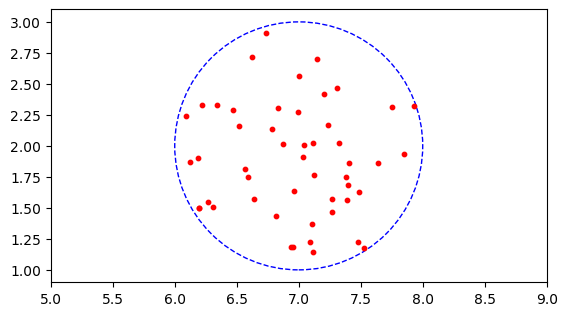

In [9]:
def generate_random_points_in_circle(center, radius, num_points):
    points = []
    for _ in range(num_points):
        r = radius * math.sqrt(random.uniform(0, 1))  # uniform distribution
        theta = random.uniform(0, 2 * math.pi)
        x = center[0] + r * math.cos(theta)
        y = center[1] + r * math.sin(theta)
        points.append((x, y))
    return points

# Parameters
center = (7, 2)
radius = 1
num_points = 50

# Generate points
points = generate_random_points_in_circle(center, radius, num_points)
x_vals, y_vals = zip(*points)

# Print 10 points per line, formatted
for i in range(0, len(points), 10):
    line = points[i:i+10]
    formatted_line = [f"[{x:.2f}, {y:.2f}]" for x, y in line]
    print(",".join(formatted_line))


# Plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
circle = plt.Circle(center, radius, color='blue', fill=False, linestyle='--')
ax.add_patch(circle)
ax.scatter(x_vals, y_vals, s=10, color='red')
ax.set_xlim(center[0] - radius - 1, center[0] + radius + 1)


[5.05, 4.64],[5.12, 5.47],[4.68, 4.59],[5.59, 5.09],[4.56, 4.98],[4.57, 4.48],[4.92, 3.75],[3.93, 4.43],[4.29, 4.87],[4.34, 4.00]
[5.53, 4.60],[4.83, 4.00],[4.53, 4.76],[4.22, 4.90],[4.50, 4.56],[4.50, 5.64],[4.79, 4.18],[5.21, 4.10],[4.90, 3.73],[4.13, 4.81]
[5.17, 4.79],[4.74, 4.56],[4.06, 4.35],[4.57, 5.24],[4.97, 3.83],[4.96, 4.52],[4.46, 5.01],[5.31, 5.17],[4.38, 4.55],[4.96, 5.20]
[4.56, 4.62],[4.24, 4.11],[5.20, 5.39],[4.76, 5.21],[4.98, 4.39],[4.98, 5.48],[4.78, 5.49],[3.49, 5.12],[4.84, 4.56],[4.84, 3.72]
[4.69, 4.89],[5.54, 4.45],[4.39, 4.46],[5.25, 4.87],[4.53, 4.97],[4.85, 5.19],[4.45, 4.55],[4.60, 3.98],[4.95, 4.84],[4.80, 4.59]
[4.09, 4.50],[4.63, 4.31],[4.72, 4.91],[5.74, 4.80],[4.93, 4.67],[3.84, 4.70],[4.83, 5.94],[4.70, 4.86],[4.78, 4.12],[5.37, 5.08]
[5.19, 4.25],[5.50, 4.01],[5.09, 5.80],[4.30, 4.43],[4.85, 4.46],[4.02, 4.74],[4.27, 4.95],[4.34, 5.48],[4.41, 4.55],[5.20, 4.09]
[4.91, 5.36],[3.99, 4.80],[4.93, 5.10],[4.18, 4.05],[5.06, 4.86],[4.92, 4.88],[4.46, 4.83]

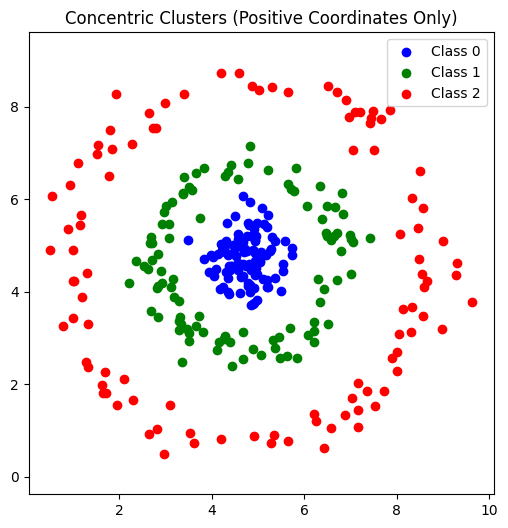

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_per_class = 100

# Blue cluster - center
r0 = np.random.normal(loc=0.0, scale=0.5, size=(n_per_class, 2))

# Green cluster - middle ring
angles1 = np.random.uniform(0, 2*np.pi, n_per_class)
radii1 = np.random.normal(loc=2.0, scale=0.3, size=n_per_class)
r1 = np.column_stack((radii1 * np.cos(angles1), radii1 * np.sin(angles1)))

# Red cluster - outer ring
angles2 = np.random.uniform(0, 2*np.pi, n_per_class)
radii2 = np.random.normal(loc=4.0, scale=0.3, size=n_per_class)
r2 = np.column_stack((radii2 * np.cos(angles2), radii2 * np.sin(angles2)))
r2 = np.column_stack((radii2 * np.cos(angles2), radii2 * np.sin(angles2)))


# Combine and shift everything to be positive
X = np.vstack([r0, r1, r2])
X_min = X.min(axis=0)
X_shifted = X - X_min + 0.5  # shift so minimum is slightly above 0

y = np.array([0]*n_per_class + [1]*n_per_class + [2]*n_per_class)

for i in range(0, len(X_shifted), 10):
    line = X_shifted[i:i+10]
    formatted_line = [f"[{x:.2f}, {y:.2f}]" for x, y in line]
    print(",".join(formatted_line))
    
# Plot
plt.figure(figsize=(6,6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.scatter(X_shifted[y == i, 0], X_shifted[y == i, 1], color=colors[i], label=f"Class {i}")
plt.axis('equal')
plt.legend()
plt.title("Concentric Clusters (Positive Coordinates Only)")
plt.show()


[2.25, 7.09],[5.70, 8.91],[4.39, 7.94],[3.59, 8.53],[0.94, 9.72],[0.94, 7.75],[0.35, 8.23],[5.20, 9.27],[3.61, 7.69],[4.25, 7.23]
[0.12, 7.87],[5.82, 7.48],[4.99, 9.79],[1.27, 9.42],[1.09, 8.90],[1.10, 9.61],[1.83, 9.41],[3.15, 7.56],[2.59, 9.68],[1.75, 8.62]
[3.67, 9.42],[0.84, 9.69],[1.75, 7.95],[2.20, 7.33],[2.74, 7.68],[4.71, 8.28],[1.20, 9.45],[3.09, 9.58],[3.55, 7.02],[0.28, 8.53]
[3.65, 8.25],[1.02, 7.67],[0.39, 7.36],[5.69, 8.01],[5.79, 9.83],[4.85, 7.97],[1.83, 8.56],[0.59, 9.11],[4.11, 8.09],[2.64, 9.92]
[0.73, 9.89],[2.97, 7.76],[0.21, 8.49],[5.46, 7.90],[1.55, 7.85],[3.98, 7.11],[1.87, 8.83],[3.12, 8.51],[3.28, 7.15],[1.11, 7.84]
[5.82, 9.72],[4.65, 7.72],[5.64, 7.43],[5.37, 8.47],[3.59, 9.96],[5.53, 7.73],[0.53, 9.02],[1.18, 9.28],[0.27, 7.71],[1.95, 9.18]
[2.33, 8.10],[1.63, 8.90],[4.97, 8.90],[2.14, 8.61],[1.69, 7.27],[3.26, 9.51],[0.85, 7.96],[4.81, 7.56],[0.45, 7.12],[5.92, 8.77]
[4.63, 9.03],[1.19, 7.05],[0.03, 8.54],[4.89, 7.68],[4.24, 8.94],[4.37, 7.52],[4.63, 9.07]

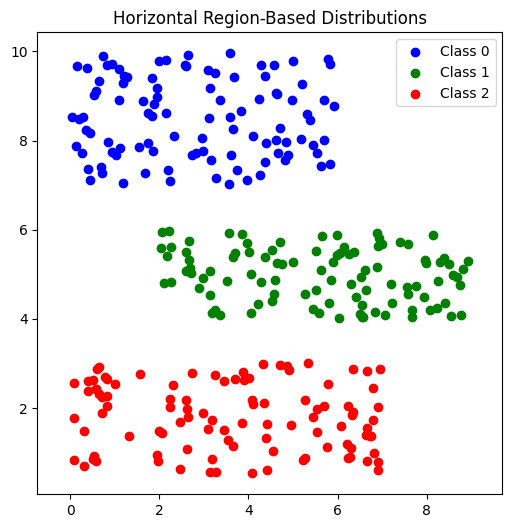

In [32]:
np.random.seed(42)
n_per_class = 100

# Blue (top)
x0 = np.random.uniform(0, 6, n_per_class)
y0 = np.random.uniform(7, 10, n_per_class)

# Green (middle)
x1 = np.random.uniform(2, 9, n_per_class)
y1 = np.random.uniform(4, 6, n_per_class)

# Red (bottom)
x2 = np.random.uniform(0, 7, n_per_class)
y2 = np.random.uniform(0.5, 3, n_per_class)

X_bar = np.vstack([np.column_stack([x0, y0]),
                   np.column_stack([x1, y1]),
                   np.column_stack([x2, y2])])
y_bar = np.array([0]*n_per_class + [1]*n_per_class + [2]*n_per_class)

for i in range(0, len(X_bar), 10):
    line = X_bar[i:i+10]
    formatted_line = [f"[{x:.2f}, {y:.2f}]" for x, y in line]
    print(",".join(formatted_line))
    
# Plot
plt.figure(figsize=(6,6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.scatter(X_bar[y_bar == i, 0], X_bar[y_bar == i, 1], color=colors[i], label=f"Class {i}")
plt.axis('equal')
plt.legend()
plt.title("Horizontal Region-Based Distributions")
plt.show()


$$\text{Abalone Dataset}$$

**Processamento de Dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('abalone.data')
df.head(10)

In [ ]:
df.replace(['M', 'I', 'F'], [0, 1, 2], inplace = True)
df.head(10)

In [ ]:
print(df[df['Height'] == 0])
df = df.drop([1257, 3996])

In [ ]:
df.hist(column = 'Rings', bins = 29)

In [ ]:
df.value_counts('Rings', sort = False)[:30]

In [ ]:
df = df[df['Rings'] <= 21]
df = df[df['Rings'] >= 3]
df.value_counts('Rings', sort = False)[:30]

In [ ]:
bins = [1, 7, 9, 11, 29]
binLabels = [0, 1, 2, 3]
df['Rings'] = pd.cut(df['Rings'], bins = bins, labels = binLabels, include_lowest = True)
df.head(15)

In [ ]:
df = df.astype({'Rings': 'int32', 'Sex': 'int32'})
df.hist(column = 'Rings')

In [ ]:
nRings = df['Rings']
dfY = nRings.to_numpy(dtype='int32')
print(dfY[:10])
dfY.shape

In [ ]:
dfArray = df.drop('Rings', axis=1).to_numpy(dtype='float32')
print(dfArray[0:10])
dfArray.shape

In [ ]:
size = int(dfArray.shape[0]*0.75)

trainDS = dfArray[:size]
testDS = dfArray[size:]
trainY = dfY[:size]
testY = dfY[size:]
print(trainDS.shape, testDS.shape, trainY.shape, testY.shape)

In [ ]:
df_code_matrix = np.array([
    [0,  1,  1],
    [ 1, 0,  1],
    [ 1,  1, 0],
    [ 1,  1, 1]
])

  $$\text{Implementação}$$

**Abalone ECOC**

In [ ]:
ecoc = ECOCClassifier(df_code_matrix)
ecoc.fit(trainDS, trainY)
predictions = ecoc.predict(testDS)
print(testY[:100])
print("\n", predictions[:100])

In [ ]:
print(np.mean(predictions == testY))

**Abalone OvA**

In [ ]:
ova = OneVsAllClassifier(lr=0.5, max_iter=10000)
ova.fit(trainDS, trainY)
predictions_OVA = ova.predict(testDS)
print(testY[:100])
print("\n", predictions_OVA[:100])

In [ ]:
print((predictions_OVA == testY))

 $$\text{Abalone Mini-batch }$$

**Abalone ECOC**

In [ ]:
ecocMB = ECOCClassifierMB(df_code_matrix,lr=0.5, max_iter=1000, batch_size=32)
ecocMB.fit(trainDS, trainY)
predictionsMB = np.array(ecocMB.predict(testDS))
print(testY[:100])
print("\n", predictionsMB[:100])

In [ ]:
print(np.mean(predictionsMB == testY))

**Abalone OvA**

In [ ]:
ovaMB = OneVsAllClassifierMB(lr=0.5, max_iter=1000, batch_size=32)
ovaMB.fit(trainDS, trainY)
predictionsMB_OVA = ovaMB.predict(testDS)
print(testY[:100])
print("\n", predictionsMB_OVA[:100])

In [ ]:
print(np.mean(predictionsMB_OVA == testY))

$$\text{Abalone Sequencial}$$

**Abalone ECOC**

In [ ]:
ecocSeq = ECOCClassifierSeq(df_code_matrix,lr=0.5, max_iter=1000)
ecocSeq.fit(trainDS, trainY)
predictionsSeq = np.array(ecocSeq.predict(testDS))
print(testY[:100])
print("\n", predictionsSeq[:100])

In [ ]:
print(np.mean(predictionsSeq == testY))

**Abalone OvA**

In [ ]:
ovaSeq = OneVsAllClassifierSeq(lr=0.5, max_iter=1000)
ovaSeq.fit(trainDS, trainY)
predictionsSeq_OVA = ovaSeq.predict(testDS)
print(testY[:100])
print("\n", predictionsSeq_OVA[:100])

In [ ]:
print(np.mean(predictionsSeq_OVA == testY))